### 38615: Computational Modelling and Machine Learning
#### Clustering Assignment HW 3

### Section 1: Preparing the data for binary classification

In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [7]:
#loading the dataset
train_Y = pd.read_csv("/Users/srinidhi/Desktop/train_y.csv") 
train_X = pd.read_csv("/Users/srinidhi/Desktop/train_X.csv") 
test_X = pd.read_csv("/Users/srinidhi/Desktop/test_X.csv") 

In [4]:
#checking for missing values
print("Number of null values in Train X are - ",train_X.isnull().values.any().sum())
print("Number of null values in Train Y are - ",train_Y.isnull().values.any().sum())
print("Number of null values in Test X are - ",test_X.isnull().values.any().sum())

Number of null values in Train X are -  0
Number of null values in Train Y are -  0
Number of null values in Test X are -  0


From the output above, we can see that there is no missing values. Hence, not necessary to remove any missing values from our dataset. 

In [8]:
#setting the indexes and viewing the dataset
train_X.set_index('Unnamed: 0', inplace=True)
train_X.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,7.062725,0.026623,6.720413,5.449267,3.868619,4.587771,7.165112,4.643161,6.771731,4.750296,...,0.325987,-5.545564,-5.545564,-5.545564,-5.545564,4.014351,4.841392,-5.545564,5.855893,3.618253
0876B4BB-58BA-4C4C-84F4-E9D19EF96147,5.965392,-5.431256,6.358498,4.161479,4.585293,4.326924,6.849703,4.391534,5.819945,3.435322,...,5.910874,-0.945029,3.750430,1.611211,-0.498573,3.430928,3.160435,-5.431256,4.413930,3.353496
EACD1021-7B52-4531-8806-B7555B73AC84,7.892221,-5.851870,8.132992,5.986320,5.422599,4.728815,8.168477,6.289562,7.331591,5.336794,...,10.103565,-5.851870,6.498217,5.481945,-5.851870,5.137298,4.296777,-5.851870,5.345372,5.028567
368ACD26-C7FB-4974-BB7F-0AE22670CB0E,6.826546,0.964851,5.998280,4.991435,4.963000,4.977695,7.149421,4.570863,6.008286,5.474553,...,2.442099,-5.994056,2.862038,1.909955,0.568120,4.768694,3.983207,-5.994056,4.609411,4.329472
F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,7.059095,2.429954,6.746639,5.591316,5.111120,5.972938,7.576201,6.032083,6.470761,5.380887,...,5.553223,-5.870484,3.044916,-5.870484,0.018320,4.640575,4.954957,-5.870484,4.620774,4.464277


In [9]:
#setting the indexes and viewing the dataset
train_Y.set_index('Unnamed: 0', inplace=True)
train_Y.head()

,xml_neoplasm_histologic_grade
Unnamed: 0,
EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,0
0876B4BB-58BA-4C4C-84F4-E9D19EF96147,1
EACD1021-7B52-4531-8806-B7555B73AC84,0
368ACD26-C7FB-4974-BB7F-0AE22670CB0E,0
F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,1


In [10]:
#setting the indexes and viewing the dataset
test_X.set_index('Unnamed: 0', inplace=True)
test_X.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1576BB97-F8EA-48FF-9494-EBC7A0C97312,7.503849,1.685440,8.090089,5.546588,3.412025,5.871539,8.395029,5.894996,6.313896,4.286261,...,3.626396,-2.640463,-7.278265,0.721287,-7.278265,4.672536,5.153675,-7.278265,4.843800,4.302864
63F4281A-4D90-4589-879E-549097FB3459,6.112919,-5.425877,5.604743,4.248246,3.374033,3.370075,6.804015,4.646287,6.236134,4.167541,...,-5.425877,-2.143410,1.956699,1.377768,-5.425877,4.560829,3.735085,-5.425877,4.105789,4.803357
74CF740D-201D-4070-99B9-F007E7C4D472,6.183846,1.217355,6.093903,4.403216,5.722867,6.123209,7.680258,4.983386,5.626569,3.518791,...,11.317818,-5.259782,5.093316,3.800607,-5.259782,4.966710,2.829487,-5.259782,5.118704,5.024979
1329E1C1-743E-4541-9081-165572D4BF47,6.325535,-0.197432,6.722632,4.509093,4.941256,3.700171,7.492606,5.031053,5.859242,4.252114,...,3.536141,-1.362703,3.480703,0.776383,-0.999629,4.794226,-5.399485,-5.399485,4.660878,4.684343
88BBA1BF-44E0-416E-A028-04F410A3FE5D,7.162383,-5.539710,6.186110,5.270282,5.412103,3.781568,7.285779,4.847552,6.337205,5.622222,...,5.112772,-5.539710,4.369268,2.927849,0.791397,4.542333,4.628775,-5.539710,4.812787,4.524834


A) Standardizing Data

When scaling our training and test data, it is important that the same scaling parameters that were learned from the training data are applied to the test data. This ensures that the test data is scaled consistently with the training data. This consistency is essential for accurate and reliable model predictions on new, unseen data.

In [11]:
#preparing our data by standardizing it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

Train_X = scaler.fit_transform(train_X)
Test_X = scaler.transform(test_X)

B) Creating Validation Sets to test our Training Data

In [12]:
#splitting the data into 80% for training and 20% for validation
from sklearn.model_selection import train_test_split
Train_X, Valid_X, Train_Y, Valid_Y = train_test_split(Train_X, train_Y, test_size=0.2, random_state=42)

C) Converting our target variable to one dimensional arrays

This conversion is often necessary as many machine learning libraries and models expect one-dimensional target arrays.

In [13]:
#transforming the Y variable into a one-dimensional array 
Train_Y = Train_Y.values.ravel()
Valid_Y = Valid_Y.values.ravel()

### Section 2: Performing binary classification using different linear models (linear regression, logistic regression, ridge regression, LASSO, etc.)

We will be searching for the best hyperparameters to be used for each model that gives us the maximum F1 score. 

#### A) Linear Regression Model

In [35]:
model = LinearRegression()

# Define the hyperparameter grid to search over
param_grid = {
    'fit_intercept': [True, False],  
    'normalize': [True, False]  
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV object to your training data
random_search.fit(Train_X, Train_Y)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Parameters", best_params)

# Get the best estimator (model)
linear_model = random_search.best_estimator_

# Predict probabilities using the linear regression model
y_pred = linear_model.predict(Valid_X)

#Define a range of potential cutoff values
cutoff_values = np.arange(0.1, 1.0, 0.1)

# Initialize variables to store best cutoff, best F1 score, and best accuracy
best_cutoff_linear = None
best_f1_linear = 0
best_accuracy_linear = 0

for cutoff in cutoff_values:
    # Apply the cutoff threshold to predict class labels
    predicted_class = (y_pred > cutoff).astype(int)
    
    # Calculate the F1 score
    f1 = f1_score(Valid_Y, predicted_class)
    
    # Calculate the accuracy
    accuracy = accuracy_score(Valid_Y, predicted_class)

# Update best cutoff if F1 score or accuracy is higher    
    if f1 > best_f1_linear:
        best_cutoff_linear = cutoff
        best_f1_linear = f1
        best_accuracy_linear = accuracy
        
# Print the best cutoff, best F1 score, and best accuracy
print("Best Cutoff Value:", best_cutoff_linear)
print("Best Accuracy:", best_accuracy_linear)
print("Best F1 Score:", best_f1_linear)

Best Parameters {'normalize': False, 'fit_intercept': True}
Best Cutoff Value: 0.5
Best Accuracy: 0.8539325842696629
Best F1 Score: 0.8712871287128713


From the above output, we can see that the best hyperparameters for a linear regression model are the default values itself, and when the cutoff value is above 0.5

#### B) Ridge Regression (Logistic Regression with L2 Regularization Technique)

B1: Choosing the best solver for Ridge Model and this dataset:

It is important for us to experiment with different solvers and evaluate their performance on our specific dataset to determine the most appropriate one. Factors such as the dataset size, the number of features, and the level of regularization needed can influence our choice of solver. 

In [13]:
from sklearn.model_selection import cross_val_score

# Models to evaluate
models = [
    ('Logistic Regression (L2)', LogisticRegression(penalty='l2', solver='lbfgs', random_state=42)),
    ('Logistic Regression (L2)', LogisticRegression(penalty='l2', solver='liblinear', random_state=42)),
    ('Logistic Regression (L2)', LogisticRegression(penalty='l2', solver='newton-cg', random_state=42)),
    ('Logistic Regression (L2)', LogisticRegression(penalty='l2', solver='saga', random_state=42)) 

]
# Evaluate each model
for model_name, model in models:
    scores = cross_val_score(model, Train_X, Train_Y, cv=5, scoring='f1')
    print(f'{model_name} - F1 Score: {np.mean(scores)} (+/- {np.std(scores)})')

Logistic Regression (L2) - F1 Score: 0.8518465035681679 (+/- 0.046095103658701744)
Logistic Regression (L2) - F1 Score: 0.790504336517991 (+/- 0.06914075736093964)
Logistic Regression (L2) - F1 Score: 0.8518465035681679 (+/- 0.046095103658701744)
Logistic Regression (L2) - F1 Score: 0.8067600742128226 (+/- 0.06448708559479618)


From the above output, we can see that lbfgs or newton-cg are the the best solvers for this datset, both giving the same exact F1 Score.

B2: Choosing the best C value for both the solvers

In [58]:
#trying for lbfgs solver first
c_values = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]

# Initialize variables to store the best hyperparameters and scores for L1 penalty
best_c_log = None
best_accuracy_log = 0.0
best_f1_log = 0.0

# Iterate through the range of C values
for c in c_values:
    # Create a logistic regression model with L1 penalty and the current C value
    model = LogisticRegression(C=c, solver='lbfgs', random_state=42)

    # Train the model on the training data
    model.fit(Train_X, Train_Y)

    # Make predictions on the validation set
    y_pred = model.predict(Valid_X)

    # Compute accuracy and F1 score on the validation set
    accuracy = accuracy_score(Valid_Y, y_pred)
    f1 = f1_score(Valid_Y, y_pred)
    
    # Check if the current model has better performance
    if f1 > best_f1_log:
        best_c_log = c
        best_accuracy_log = accuracy
        best_f1_log = f1

# Print the best hyperparameters and scores for L1 penalty
print("Best C for Logistic Regression:", best_c_log)
print("Best Accuracy on Validation Set for Logistic Regression:", best_accuracy_log)
print("Best F1 Score on Validation Set for Logistic Regression:", best_f1_log)

Best C for Logistic Regression: 0.1
Best Accuracy on Validation Set for Logistic Regression: 0.8651685393258427
Best F1 Score on Validation Set for Logistic Regression: 0.8846153846153846


In [61]:
#trying for newton-cg solver next
c_values = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]

# Initialize variables to store the best hyperparameters and scores for L1 penalty
best_c_log = None
best_accuracy_log = 0.0
best_f1_log = 0.0
ridgeaccuracy_scores = []
ridgef1_scores = []

# Iterate through the range of C values
for c in c_values:
    # Create a logistic regression model with L1 penalty and the current C value
    model = LogisticRegression(C=c, solver='newton-cg', random_state=42)

    # Train the model on the training data
    model.fit(Train_X, Train_Y)

    # Make predictions on the validation set
    y_pred = model.predict(Valid_X)

    # Compute accuracy and F1 score on the validation set
    accuracy = accuracy_score(Valid_Y, y_pred)
    f1 = f1_score(Valid_Y, y_pred)
    ridgeaccuracy_scores.append(accuracy)
    ridgef1_scores.append(f1)
    
    # Check if the current model has better performance
    if f1 > best_f1_log:
        best_c_log = c
        best_accuracy_log = accuracy
        best_f1_log = f1

# Print the best hyperparameters and scores for L1 penalty
print("Best C for Logistic Regression:", best_c_log)
print("Best Accuracy on Validation Set for Logistic Regression:", best_accuracy_log)
print("Best F1 Score on Validation Set for Logistic Regression:", best_f1_log)

Best C for Logistic Regression: 0.1
Best Accuracy on Validation Set for Logistic Regression: 0.8651685393258427
Best F1 Score on Validation Set for Logistic Regression: 0.8846153846153846


From the above output, we can confirm that the best model fit with ridge regression is produced is when c = 0.1 for both models

B3: Studying the effect of regularization parameter("c") on our ridge model performance

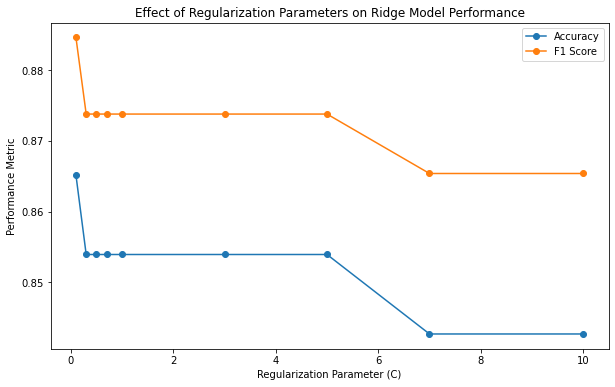

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(c_values, ridgeaccuracy_scores, label='Accuracy', marker='o')
plt.plot(c_values, ridgef1_scores, label='F1 Score', marker='o')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Performance Metric')
plt.legend()
plt.title('Effect of Regularization Parameters on Ridge Model Performance')
plt.show()

The above plot shows and confirms that c=0.1 gives us the best f1 and accuracy score. 

B4: Choosing the best maximum number of iterations for our ridge model

In [59]:
#trying for lbfgs solver first
max_values = [100,200,300,400,500]

# Initialize variables to store the best hyperparameters and scores for L1 penalty
best_max_ridge = None
best_accuracy_ridge = 0.0
best_f1_ridge = 0.0

# Iterate through the range of C values
for max in max_values:
    # Create a logistic regression model with L1 penalty and the current C value
    ridgemodel = LogisticRegression(C=0.1, solver='lbfgs', random_state=42, max_iter=max)

    # Train the model on the training data
    ridgemodel.fit(Train_X, Train_Y)

    # Make predictions on the validation set
    y_pred = ridgemodel.predict(Valid_X)

    # Compute accuracy and F1 score on the validation set
    accuracy = accuracy_score(Valid_Y, y_pred)
    f1 = f1_score(Valid_Y, y_pred)
    
    # Check if the current model has better performance
    if f1 > best_f1_ridge:
        best_max_ridge = max
        best_accuracy_ridge = accuracy
        best_f1_ridge = f1

# Print the best hyperparameters and scores for L1 penalty
print("Best Max for Logistic Regression:", best_max_ridge)
print("Best Accuracy on Validation Set for Logistic Regression:", best_accuracy_ridge)
print("Best F1 Score on Validation Set for Logistic Regression:", best_f1_ridge)

Best Max for Logistic Regression: 100
Best Accuracy on Validation Set for Logistic Regression: 0.8651685393258427
Best F1 Score on Validation Set for Logistic Regression: 0.8846153846153846


In [22]:
#trying for newton-cg solver next
max_values = [100,200,300,400,500]

# Initialize variables to store the best hyperparameters and scores for L1 penalty
best_max_log = None
best_accuracy_log = 0.0
best_f1_log = 0.0

# Iterate through the range of C values
for max in max_values:
    # Create a logistic regression model with L1 penalty and the current C value
    model = LogisticRegression(C=0.1, solver='newton-cg', random_state=42, max_iter=max)

    # Train the model on the training data
    model.fit(Train_X, Train_Y)

    # Make predictions on the validation set
    y_pred = model.predict(Valid_X)

    # Compute accuracy and F1 score on the validation set
    accuracy = accuracy_score(Valid_Y, y_pred)
    f1 = f1_score(Valid_Y, y_pred)
    
    # Check if the current model has better performance
    if f1 > best_f1_log:
        best_max_log = max
        best_accuracy_log = accuracy
        best_f1_log = f1

# Print the best hyperparameters and scores for L1 penalty
print("Best Max for Logistic Regression:", best_max_log)
print("Best Accuracy on Validation Set for Logistic Regression:", best_accuracy_log)
print("Best F1 Score on Validation Set for Logistic Regression:", best_f1_log)

Best Max for Logistic Regression: 100
Best Accuracy on Validation Set for Logistic Regression: 0.8651685393258427
Best F1 Score on Validation Set for Logistic Regression: 0.8846153846153846


This confirms that 100 is a good maximum number of iterations (the default value) to have and that the value of max iterations does not affect the score. 

B5: Using Hyperparameter Grid and Cross Validation to reconfirm the best hyperparameters we have found for ridge regression 

In [278]:
# Define the hyperparameter grid for C values
param_grid = {
    'C': [0.1, 0.5, 1, 2, 5, 10],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
}

# Create a Logistic Regression model
model = LogisticRegression(penalty='l2', random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, scoring='f1', random_state=42)

# Fit the RandomizedSearchCV object to your training data
random_search.fit(Train_X, Train_Y)

# Get the best hyperparameters
best_params = random_search.best_params_

# Get the best estimator (model)
ridge_model = random_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = ridge_model.predict(Valid_X)

# Compute accuracy and F1 score on the validation set
accuracy_ridge = accuracy_score(Valid_Y, y_pred)
f1_ridge = f1_score(Valid_Y, y_pred)

# Print the best hyperparameters and scores
print("Best C for Ridge Regression:", best_params['C'])
print("Best Solver for Ridge Regression:", best_params['solver'])
print("Best Max Iterations for Ridge Regression:", best_params['max_iter']) 

print("Best Accuracy on Validation Set for Ridge Regression:", accuracy_ridge)
print("Best F1 Score on Validation Set for Ridge Regression:", f1_ridge)

Best C for Ridge Regression: 2
Best Solver for Ridge Regression: newton-cg
Best Max Iterations for Ridge Regression: 100
Best Accuracy on Validation Set for Ridge Regression: 0.8539325842696629
Best F1 Score on Validation Set for Ridge Regression: 0.8737864077669903


From our Paramameter Search, we can see that the best combination of parameters actually gives us a lower F1 score than what we had found previously. Since our goal is to maximise our F1 Score, we will be retaining our original findings for the purpose of this assignment. 

#### C) Lasso Regression (Logistic Regression with L1 Regularization Technique)

C1: Choosing the best solver for Lasso Model and this dataset:

It is important for us to experiment with different solvers and evaluate their performance on our specific dataset to determine the most appropriate one. Factors such as the dataset size, the number of features, and the level of regularization needed can influence our choice of solver. 

In [39]:
from sklearn.model_selection import cross_val_score

# Models to evaluate
models = [
    ('Logistic Regression (L1)', LogisticRegression(penalty='l1', solver='liblinear', random_state=42)),
    ('Logistic Regression (L1)', LogisticRegression(penalty='l1', solver='saga', random_state=42)) 

]
# Evaluate each model
for model_name, model in models:
    scores = cross_val_score(model, Train_X, Train_Y, cv=5, scoring='f1')
    print(f'{model_name} - F1 Score: {np.mean(scores)} (+/- {np.std(scores)})')

Logistic Regression (L1) - F1 Score: 0.8095040349069169 (+/- 0.07228890657528413)
Logistic Regression (L1) - F1 Score: 0.8061247727070512 (+/- 0.05704131823073624)


Given the F1 Score, we can confirm that "liblinear" solver produces a better model as its F1 Score is higher. Hence, we will be using "liblinear" for our Lasso Model.

C2: Choosing the best C value for our "liblinear" solver

In [66]:
c_values = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]

# Initialize variables to store the best hyperparameters and scores for L1 penalty
best_c_l1 = None
best_accuracy_l1 = 0.0
best_f1_l1 = 0.0
lassoaccuracy_scores = []
lassof1_scores = []

# Iterate through the range of C values
for c in c_values:
    # Create a logistic regression model with L1 penalty and the current C value
    model = LogisticRegression(C=c, penalty='l1', random_state=42, solver="liblinear")

    # Train the model on the training data
    model.fit(Train_X, Train_Y)

    # Make predictions on the validation set
    y_pred = model.predict(Valid_X)

    # Compute accuracy and F1 score on the validation set
    accuracy_lasso = accuracy_score(Valid_Y, y_pred)
    f1_lasso = f1_score(Valid_Y, y_pred)
    lassoaccuracy_scores.append(accuracy_lasso)
    lassof1_scores.append(f1_lasso)

    # Check if the current model has better performance
    if f1_lasso > best_f1_l1:
        best_c_l1 = c
        best_accuracy_l1 = accuracy_lasso
        best_f1_l1 = f1_lasso

# Print the best hyperparameters and scores for L1 penalty
print("Best C for L1 Penalty:", best_c_l1)
print("Best Accuracy on Validation Set for L1 Regression:", best_accuracy_l1)
print("Best F1 Score on Validation Set for L1 Regression:", best_f1_l1)

Best C for L1 Penalty: 10
Best Accuracy on Validation Set for L1 Regression: 0.8202247191011236
Best F1 Score on Validation Set for L1 Regression: 0.8431372549019608


C3: Studying the effect of regularization parameter("c") on our lasso model performance

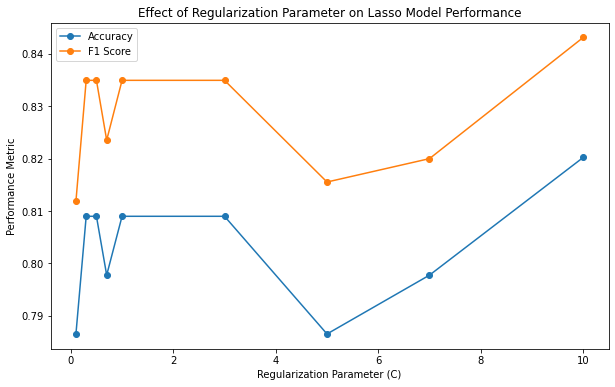

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(c_values, lassoaccuracy_scores, label='Accuracy', marker='o')
plt.plot(c_values, lassof1_scores, label='F1 Score', marker='o')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Performance Metric')
plt.legend()
plt.title('Effect of Regularization Parameter on Lasso Model Performance')
plt.show()

The above plot shows and confirms that c=10 gives us the best f1 and accuracy score.

C4: Choosing the best maximum number of iterations for our lasso model

In [54]:
max_values = [100,300,500,700,1000]

# Initialize variables to store the best hyperparameters and scores for L1 penalty
best_max_lasso = None
best_accuracy_lasso = 0.0
best_f1_lasso = 0.0

# Iterate through the range of C values
for max in max_values:
    # Create a logistic regression model with L1 penalty and the current C value
    model = LogisticRegression(C=10, penalty='l1', random_state=42, solver="liblinear")

    # Train the model on the training data
    model.fit(Train_X, Train_Y)

    # Make predictions on the validation set
    y_pred = model.predict(Valid_X)

    # Compute accuracy and F1 score on the validation set
    accuracy_lasso = accuracy_score(Valid_Y, y_pred)
    f1_lasso = f1_score(Valid_Y, y_pred)

    # Check if the current model has better performance
    if f1_lasso > best_f1_lasso:
        best_max_lasso = max
        best_accuracy_lasso = accuracy_lasso
        best_f1_lasso = f1_lasso

# Print the best hyperparameters and scores for L1 penalty
print("Best Max for L1 Penalty:", best_max_lasso)
print("Best Accuracy on Validation Set for L1 Regression:", best_accuracy_lasso)
print("Best F1 Score on Validation Set for L1 Regression:", best_f1_lasso)

Best Max for L1 Penalty: 100
Best Accuracy on Validation Set for L1 Regression: 0.8202247191011236
Best F1 Score on Validation Set for L1 Regression: 0.8431372549019608


This confirms that 100 is a good maximum number of iterations (the default value) to have and that the value of max iterations does not affect the score. 

C5: Using Hyperparameter Grid and Cross Validation to reconfirm the best hyperparameters we have found for lasso regression 

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for C values
param_grid = {
    'C': [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10],
    'max_iter': [100, 200, 300, 400, 500],
}

# Create a Logistic Regression model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to your training data
grid_search.fit(Train_X, Train_Y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
lasso_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = lasso_model.predict(Valid_X)

# Compute accuracy and F1 score on the validation set
accuracy_lasso = accuracy_score(Valid_Y, y_pred)
f1_lasso = f1_score(Valid_Y, y_pred)

# Print the best hyperparameters and scores
print("Best C for Logistic Regression:", best_params['C'])
print("Best Max Iterations for Logistic Regression:", best_params['max_iter']) 

print("Best Accuracy on Validation Set for Logistic Regression:", accuracy_lasso)
print("Best F1 Score on Validation Set for Logistic Regression:", f1_lasso)

Best C for Logistic Regression: 5
Best Max Iterations for Logistic Regression: 100
Best Accuracy on Validation Set for Logistic Regression: 0.7865168539325843
Best F1 Score on Validation Set for Logistic Regression: 0.8155339805825242


From our Paramameter Search, we can see that the best combination of parameters actually gives us a lower F1 score than what we had found previously. Since our goal is to maximise our F1 Score, we will be retaining our original findings for the purpose of this assignment. 


#### D) Elastic-Net Regression

D1: Choosing the best solver for Elastic-Net Model and this dataset:

For elastic-net regression, the 'saga' solver is the only solver that supports both L1 and L2 penalties. Hence, we will be using it as our default solver. 


D2: Choosing the best C and L1 ratio values for our "saga" solver

In [281]:
c_values = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]
l1_ratio_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialize variables to store the best hyperparameters and scores for Elastic Net
best_c_elastic = None
best_l1_ratio_elastic = None
best_accuracy_elastic = 0.0
best_f1_elastic = 0.0
elasticaccuracy_scores = []
elasticf1_scores = []

# Iterate through the range of C values and l1_ratio values
for c in c_values:
    for l1_ratio in l1_ratio_values:
        # Create a logistic regression model with Elastic Net penalty and the current C and l1_ratio values
        model = LogisticRegression(C=c, penalty='elasticnet', random_state=42, solver="saga", l1_ratio=l1_ratio)

        # Train the model on the training data
        model.fit(Train_X, Train_Y)

        # Make predictions on the validation set
        y_pred = model.predict(Valid_X)

        # Compute accuracy and F1 score on the validation set
        accuracy_elastic = accuracy_score(Valid_Y, y_pred)
        f1_elastic = f1_score(Valid_Y, y_pred)
        elasticaccuracy_scores.append(accuracy_elastic)
        elasticf1_scores.append(f1_elastic)


        # Check if the current model has better performance
        if f1_elastic > best_f1_elastic:
            best_c_elastic = c
            best_l1_ratio_elastic = l1_ratio
            best_accuracy_elastic = accuracy_elastic
            best_f1_elastic = f1_elastic

# Print the best hyperparameters and scores for Elastic Net penalty
print("Best C for Elastic Net Penalty:", best_c_elastic)
print("Best l1_ratio for Elastic Net Penalty:", best_l1_ratio_elastic)
print("Best Accuracy on Validation Set for Elastic Net:", best_accuracy_elastic)
print("Best F1 Score on Validation Set for Elastic Net:", best_f1_elastic)

Best C for Elastic Net Penalty: 0.1
Best l1_ratio for Elastic Net Penalty: 0.5
Best Accuracy on Validation Set for Elastic Net: 0.8089887640449438
Best F1 Score on Validation Set for Elastic Net: 0.8282828282828283


D3: Studying the effect of regularization parameter("c") on our elastic-net model performance

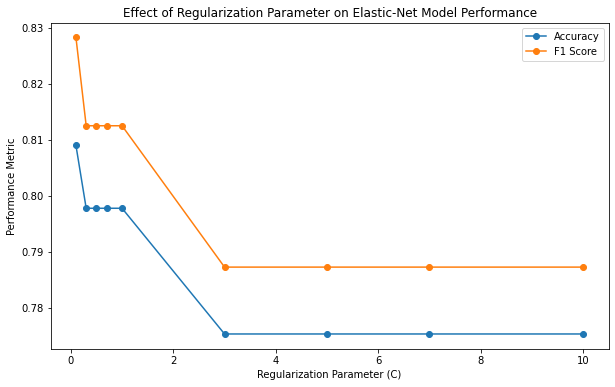

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(c_values, elasticaccuracy_scores, label='Accuracy', marker='o')
plt.plot(c_values, elasticf1_scores, label='F1 Score', marker='o')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Performance Metric')
plt.legend()
plt.title('Effect of Regularization Parameter on Elastic-Net Model Performance')
plt.show()

The above plot shows and confirms that c=0.1 gives us the best f1 and accuracy score.

D4: Using Hyperparameter Grid and Cross Validation to reconfirm the best hyperparameters we have found for elastic-net regression 

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for C values
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'l1_ratio' : [0.1,0.3,0.5,0.7,0.9] ,
}

# Create a Logistic Regression model
model = LogisticRegression(penalty='elasticnet', solver='saga', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to your training data
grid_search.fit(Train_X, Train_Y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
elastic_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = elastic_model.predict(Valid_X)

# Compute accuracy and F1 score on the validation set
accuracy_elastic = accuracy_score(Valid_Y, y_pred)
f1_elastic = f1_score(Valid_Y, y_pred)

# Print the best hyperparameters and scores
print("Best C for Elastic-Net Regression:", best_params['C'])
print("Best L1 Ratio for Elastic-Net Regression:", best_params['l1_ratio']) 

print("Best Accuracy on Validation Set for Elastic-Net Regression:", accuracy_elastic)
print("Best F1 Score on Validation Set for Elastic-Net Regression:", f1_elastic)

Best C for Elastic-Net Regression: 0.1
Best L1 Ratio for Elastic-Net Regression: 0.3
Best Accuracy on Validation Set for Elastic-Net Regression: 0.8089887640449438
Best F1 Score on Validation Set for Elastic-Net Regression: 0.8247422680412373


### Section 3: Studying the effect of regularization parameter(s) on model performance

We will be measuring the classification performance of the different models using accuracy and F1-score.

In [70]:
summary = [
    ['Linear Regression Model', best_accuracy_linear, best_f1_linear],
    ['Logistic Regression with L1 Penalty (L1)', best_accuracy_lasso, best_f1_lasso],
    ['Logistic Regression with L2 Penalty (L2)', best_accuracy_ridge, best_f1_ridge],
    ['Logistic Regression with Elastic-net Penalty', best_accuracy_elastic, best_f1_elastic],
]

columns = ['Model Type', 'Best Accuracy', 'Best F1 Score']

summary = pd.DataFrame(summary, columns=columns)
print(summary)

                                     Model Type  Best Accuracy  Best F1 Score
0                       Linear Regression Model       0.853933       0.871287
1      Logistic Regression with L1 Penalty (L1)       0.820225       0.843137
2      Logistic Regression with L2 Penalty (L2)       0.865169       0.884615
3  Logistic Regression with Elastic-net Penalty       0.808989       0.828283


In [71]:
max_value_Accuracy = summary['Best Accuracy'].max()
row_max_Accuracy = summary[summary['Best Accuracy'] == max_value_Accuracy]

max_value_f1 = summary['Best F1 Score'].max()
row_max_f1 = summary[summary['Best F1 Score'] == max_value_f1]

# Display the rows with the maximum values
print("Maximum Accuracy is observed for:")
print(row_max_Accuracy)

print("\nMaximum F1 Value is observed for:")
print(row_max_f1)

Maximum Accuracy is observed for:
                                 Model Type  Best Accuracy  Best F1 Score
2  Logistic Regression with L2 Penalty (L2)       0.865169       0.884615

Maximum F1 Value is observed for:
                                 Model Type  Best Accuracy  Best F1 Score
2  Logistic Regression with L2 Penalty (L2)       0.865169       0.884615


Both maximum accuracy and f1 score is observed for ridge regression. This is what we uploaded to Kaggle.

### Section 4: Comparing our best model accuracy with random guessing (through y-Randomization)

We will be simulating random guessing by assinging classes to predictions purely based on chance. We will then calculate accuracy for random guessing (by counting how many of the random guesses are correct). 

In [91]:
# Train and evaluate the original model
original_model = LogisticRegression(C=0.1, penalty="l2", solver='newton-cg', random_state=42)
original_model.fit(Train_X, Train_Y)
y_pred_original = original_model.predict(Valid_X)
accuracy_original = accuracy_score(Valid_Y, y_pred_original)

# Randomize the target variable (Y)
RandomTrain_Y = Train_Y.copy()
np.random.shuffle(RandomTrain_Y)

# Train and evaluate the randomized model
randomized_model = LogisticRegression(C=0.1, solver='newton-cg', random_state=42)
randomized_model.fit(Train_X, RandomTrain_Y)
y_pred_randomized = randomized_model.predict(Valid_X)
accuracy_randomized = accuracy_score(Valid_Y, y_pred_randomized)

accuracy_difference = accuracy_original - accuracy_randomized
percentage_difference = (accuracy_difference / accuracy_randomized) * 100

# Compare accuracy of the original model with the randomized model
print("Accuracy of the Original Model:", accuracy_original)
print("Accuracy of the Randomized Model:", accuracy_randomized)
print(f"Percentage Difference: {percentage_difference:.2f}%")

if accuracy_difference > 0:
    print(f"The original model is {percentage_difference:.2f}% better than random guessing.")
else:
    print("The original model is not better than random guessing.")

Accuracy of the Original Model: 0.8651685393258427
Accuracy of the Randomized Model: 0.5393258426966292
Percentage Difference: 60.42%
The original model is 60.42% better than random guessing.


Let's try it with a few trials of randomization to see if we get similar scores

In [348]:
num_tests = 10
total_percentage_difference = 0

for i in range(num_tests):
    original_model = LogisticRegression(C=0.1, penalty="l2", solver='newton-cg', random_state=42)
    original_model.fit(Train_X, Train_Y)
    y_pred_original = original_model.predict(Valid_X)
    accuracy_original = accuracy_score(Valid_Y, y_pred_original)

    RandomTrain_Y = Train_Y.copy()
    np.random.shuffle(RandomTrain_Y)

    # Train and evaluate the randomized model
    randomized_model = LogisticRegression(C=0.1,penalty="l2", solver='newton-cg', random_state=42)
    randomized_model.fit(Train_X, RandomTrain_Y)
    y_pred_randomized = randomized_model.predict(Valid_X)
    accuracy_randomized = accuracy_score(Valid_Y, y_pred_randomized)

    accuracy_difference = accuracy_original - accuracy_randomized
    percentage_difference = (accuracy_difference / accuracy_randomized)

    # Accumulate the percentage difference for later averaging
    total_percentage_difference += percentage_difference

# Calculate and print the average percentage difference
average_percentage_difference = total_percentage_difference / num_tests
print(f"Average Percentage Difference over {num_tests} Tests: {average_percentage_difference}")

Average Percentage Difference over 10 Tests: 0.7748027757570668


Since our model's accuracy is significantly higher (~ 60 to 70%) than random guessing, it's a good sign that our model is learning something useful from the data.

### Section 5: Feature Engineering (Finding genes that are most important for our model decision)

We will be using Lasso Regression for this. Lasso regression is useful for feature selection. It adds a penalty term to the linear regression objective function, which encourages the model to set the coefficients of less important features to zero. Features with non-zero coefficients are considered important, and features with zero coefficients are considered unimportant.

In [16]:
lasso = LogisticRegression(penalty="l1", C = 10, solver="liblinear", random_state=42)

# Fit the Lasso model to your data
lasso.fit(Train_X, Train_Y)

# Get the coefficients of the features
coefficients = lasso.coef_

# Get the absolute coefficients
abs_coefficients = np.abs(coefficients[0])

imptfeatures_df = pd.DataFrame(data={'Feature Names': train_X.columns, 'Coefficients (Abs)': abs_coefficients})
imptfeatures_df = imptfeatures_df.sort_values(by='Coefficients (Abs)', ascending=False)

imptfeatures_df.head()


,Feature Names,Coefficients (Abs)
12532,ENSG00000173157,0.503697
13574,ENSG00000180316,0.456726
4280,ENSG00000115604,0.380676
13265,ENSG00000177947,0.305587
8119,ENSG00000144290,0.301129


Gene with the highest coefficient, and therefore the most important here is "ENSG00000144290". The top 5 genes (in ascending order) have been displayed in the table above. 

### Section 6: Retrying our regression models with only the important features


6A) Creating a new dataframe for Train X with only the important features

Here, we have identified the important features as features with coefficients more than the mean value. So here, we are only selecting 50% of the data that we believe are important, and dropping the other 50%. 

In [ ]:
mean_value = imptfeatures_df['Coefficients (Abs)'].mean()

top50features = imptfeatures_df['Coefficients (Abs)'] > mean_value

# Apply the mask to filter the DataFrame
top50features_df = imptfeatures_df[top50features]

# Print the filtered DataFrame
print(mean_value)
print(top50features_df)
print(len(top50features_df))


         Feature Names  Coefficients (Abs)
8119   ENSG00000144290            0.426315
13574  ENSG00000180316            0.410492
14707  ENSG00000186970            0.408481
15816  ENSG00000198812            0.395188
13265  ENSG00000177947            0.332374
...                ...                 ...
655    ENSG00000050767            0.002639
8942   ENSG00000151655            0.002620
15127  ENSG00000196091            0.002617
12991  ENSG00000176155            0.002557
13446  ENSG00000179270            0.002468

[737 rows x 2 columns]
737


In [239]:
# Extract the list of feature names from filtered_df
filtered_feature_names = imptfeatures_df['Feature Names'].tolist()

# Filter the feature names in Train_X that are in the filtered list
filtered_train_X = train_X[filtered_feature_names].copy

In [273]:
filtered_columns = top50features_df['Feature Names'].tolist()
filtered_trainX = train_X[filtered_columns].copy()
filtered_testX = test_X[filtered_columns].copy()

filtered_trainX.head()

,ENSG00000144290,ENSG00000180316,ENSG00000186970,ENSG00000198812,ENSG00000177947,ENSG00000171595,ENSG00000115507,ENSG00000183269,ENSG00000153714,ENSG00000272804,...,ENSG00000165757,ENSG00000182816,ENSG00000177283,ENSG00000088386,ENSG00000167992,ENSG00000050767,ENSG00000151655,ENSG00000196091,ENSG00000176155,ENSG00000179270
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,-5.545564,-0.552217,-5.545564,-5.545564,-2.591861,0.841482,4.072424,-5.545564,5.000133,-5.545564,...,5.056630,-5.545564,6.397027,4.560478,3.932952,5.221290,2.093617,-5.545564,5.056569,-5.545564
0876B4BB-58BA-4C4C-84F4-E9D19EF96147,0.009192,-1.023171,-5.431256,-0.868416,-1.047912,0.441649,3.406330,-5.431256,4.126637,-5.431256,...,3.875505,-5.431256,5.894861,4.758385,2.730398,6.420057,1.427266,-1.912740,4.293231,-0.694802
EACD1021-7B52-4531-8806-B7555B73AC84,0.430614,-5.851870,-5.851870,0.704189,-5.851870,0.815245,5.688108,-5.851870,5.758435,-5.851870,...,4.394132,-5.851870,6.628883,8.583412,3.521284,7.888249,4.824663,-5.851870,6.469896,-5.851870
368ACD26-C7FB-4974-BB7F-0AE22670CB0E,-1.754195,0.331203,-5.994056,-0.207189,-5.994056,6.271409,4.116085,-5.994056,4.927621,0.087831,...,4.106226,-5.994056,5.575181,5.079910,3.309869,2.934991,3.566756,-0.152901,5.569141,-1.236231
F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,-0.724797,0.880016,-5.870484,-5.870484,-5.870484,-5.870484,3.301508,-5.870484,6.165321,0.623398,...,4.243541,-5.870484,6.963675,4.249375,4.192860,5.996565,3.448576,-5.870484,5.132728,-0.687418


In [274]:
filtered_TrainX = scaler.fit_transform(filtered_trainX)
filtered_TestX = scaler.fit_transform(filtered_testX)

from sklearn.model_selection import train_test_split
filtered_Train_X, filtered_Valid_X, filtered_Train_Y, filtered_Valid_Y = train_test_split(filtered_TrainX, train_Y, test_size=0.2, random_state=42)

6B) Linear Regression with Feature Selection

In [290]:
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(filtered_Train_X, filtered_Train_Y)

# Assess model performance on the validation set
y_pred = linear_model.predict(filtered_Valid_X)
predicted_class = (y_pred > 0.5).astype(int)
    
# Calculate the F1 score
f1_ImpLinear = f1_score(filtered_Valid_Y, predicted_class)
    
# Calculate the accuracy
accuracy_ImpLinear = accuracy_score(filtered_Valid_Y, predicted_class)

print("Accuracy on Validation Set for Linear Regression with Feature Selection :", accuracy_ImpLinear)
print("F1 Score on Validation Set for Linear Regression with Feature Selection :", f1_ImpLinear)

Accuracy on Validation Set for Linear Regression with Feature Selection : 0.8202247191011236
F1 Score on Validation Set for Linear Regression with Feature Selection : 0.8367346938775511


6C) Ridge Regression with Feature Selection

In [271]:
ridge_model = LogisticRegression(penalty="l2", C=0.1, solver="newton-cg", max_iter=100)

# Train the model on the training data
ridge_model.fit(filtered_Train_X, filtered_Train_Y)

# Assess model performance on the validation set
predicted_class = ridge_model.predict(filtered_Valid_X)
    
# Calculate the F1 score
f1_ImpRidge = f1_score(filtered_Valid_Y, predicted_class)
    
# Calculate the accuracy
accuracy_ImpRidge = accuracy_score(filtered_Valid_Y, predicted_class)

print("Accuracy on Validation Set for Ridge Regression with Feature Selection :", accuracy_ImpRidge)
print("F1 Score on Validation Set for Ridge Regression with Feature Selection :", f1_ImpRidge)

Accuracy on Validation Set for Ridge Regression with Feature Selection : 0.8426966292134831
F1 Score on Validation Set for Ridge Regression with Feature Selection : 0.8627450980392157


6D) Lasso Regression with Feature Selection

In [286]:
lasso_model = LogisticRegression(penalty="l1", C = 10, solver="liblinear", random_state=42)

# Train the model on the training data
lasso_model.fit(filtered_Train_X, filtered_Train_Y)

# Assess model performance on the validation set
y_pred = lasso_model.predict(filtered_Valid_X)
    
# Calculate the F1 score
f1_ImpLasso = f1_score(filtered_Valid_Y, y_pred)
    
# Calculate the accuracy
accuracy_ImpLasso = accuracy_score(filtered_Valid_Y, y_pred)

print("Accuracy on Validation Set for Lasso Regression with Feature Selection :", accuracy_ImpLasso)
print("F1 Score on Validation Set for Lasso Regression with Feature Selection :", f1_ImpLasso)

Accuracy on Validation Set for Lasso Regression with Feature Selection : 0.8314606741573034
F1 Score on Validation Set for Lasso Regression with Feature Selection : 0.8543689320388349


6C) Elastic Net Regression with Feature Selection

In [287]:
elastic_model = LogisticRegression(C=0.1, penalty='elasticnet', random_state=42, solver="saga", l1_ratio=0.3)

# Train the model on the training data
elastic_model.fit(filtered_Train_X, filtered_Train_Y)

# Assess model performance on the validation set
y_pred = elastic_model.predict(filtered_Valid_X)
    
# Calculate the F1 score
f1_ImpElastic = f1_score(filtered_Valid_Y, y_pred)
    
# Calculate the accuracy
accuracy_ImpElastic = accuracy_score(filtered_Valid_Y, y_pred)

print("Accuracy on Validation Set for Elastic-Net Regression with Feature Selection :", accuracy_ImpElastic)
print("F1 Score on Validation Set for Elastic-Net Regression with Feature Selection :", f1_ImpElastic)

Accuracy on Validation Set for Elastic-Net Regression with Feature Selection : 0.8314606741573034
F1 Score on Validation Set for Elastic-Net Regression with Feature Selection : 0.8571428571428571


### Section 7: Visualizing the dataset to see if you there are any group/clustering of patients

t-SNE is more preferred for visualizing and exploring high-dimensional data, in a lower-dimensional space while preserving non-linear patterns and structures. Hence, we will be using t-SNE for this section

In [264]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(filtered_TrainX)

tsne_df = pd.DataFrame(data={'tSNE1': X_tsne[:, 0], 'tSNE2': X_tsne[:, 1], 'Y-Labels': train_Y.values.flatten()})
tsne_df.head()

,tSNE1,tSNE2,Y-Labels
0,6.378516,-0.000949,0
1,8.340381,-4.351719,1
2,3.676410,8.484169,0
3,-4.061326,4.042249,0
4,-10.776715,6.291079,1


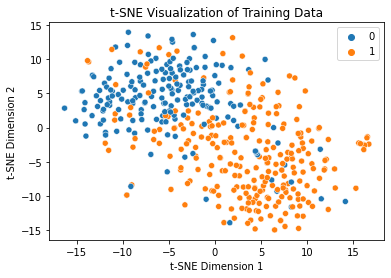

In [317]:
import seaborn as sns
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=train_Y.values.flatten())
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Training Data")

plt.show()

From the plot above, we can clearly see that there are two distinct clusters (blue and orange). This shows that the first two tSNE componenets/features are able to split the data well into 2 clusters.

The blue points (datapoints with label 0, encoding tumor grade “II-) are more clustered on the top left, while the orange points (datapoints with label 1, encoding tumor grade “III+”) are more clusted on the bottom right of the tSNE plot. 

### Section 8: Exploring meaningful connection between the top 10 most important genes and the disease

In [18]:
imptfeatures_df.head(10)

,Feature Names,Coefficients (Abs)
12532,ENSG00000173157,0.503697
13574,ENSG00000180316,0.456726
4280,ENSG00000115604,0.380676
13265,ENSG00000177947,0.305587
8119,ENSG00000144290,0.301129
17061,ENSG00000236279,0.281994
16773,ENSG00000221813,0.279414
2782,ENSG00000104313,0.276036
15816,ENSG00000198812,0.271952
1865,ENSG00000091583,0.262125


By analysing the functions of the proteins encoded by the top 10 genes identified above, we can see that they all play a key role in cellular growth. And this makes sense since cancer is often described as a disease characterized by uncontrolled and abnormal cellular growth. Either these proteins have promote excessive cell growth or inhibit cell death - which are result from a disruption in the normal regulation of cell growth and division.

Based on google search, the genes that are identified to be associated with Endometrial carcinomas are TP53 PTEN PIK3R1 PIK3CA PGR KRAS. Unfortunately, none of of our top genes identified above code for the proteins listed above, which suggest that our approach of using Lasso Regression to pick the most important genes using the coefficient values may not be the most ideal. 

Below we will be trying another method (Recursive Feature Elimination) to see if this makes any changes to our result, and if it is better at predicting the top genes associated with UCEC.

In [20]:
from sklearn.feature_selection import RFE

# Create a logistic regression model
logistic_model = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg', random_state=42, max_iter=100)

rfe = RFE(logistic_model, 10)

# Fit RFE to your training data
rfe.fit(Train_X, Train_Y)

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Create a DataFrame to associate feature names with their ranking
feature_ranking_df = pd.DataFrame({'Feature': train_X.columns, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking and print the top 10 most important features
top_10_features = feature_ranking_df.sort_values(by='Ranking').head(10)
print("Top 10 Most Important Features:")
print(top_10_features)

Top 10 Most Important Features:
               Feature  Ranking
17770  ENSG00000272804        1
2281   ENSG00000100665        1
274    ENSG00000011201        1
2856   ENSG00000104833        1
12361  ENSG00000172247        1
15320  ENSG00000196782        1
4259   ENSG00000115507        1
1511   ENSG00000082512        1
14019  ENSG00000183269        1
9745   ENSG00000159217        1


When analysing the proteins encoded by the top 10 genes we have identified with RFE above, there are some genes that have shown proven associations with UCEC. I managed to find 2 such genes - one is ENSG00000104833, which encodes for protein TUBB4A. Based on research, TUBB4A is associated with telemoere maintenance and contributes to EC carcinogenesis and prognosis. And the other gene is ENSG00000159217, which encodes for protein IGF2BP1. Gene enrichment analysis have indicated that high IGF2BP1 gene expression is associated with cytoplasmic stress granules, which is a good indicator/predictor for UCEC patient prognosis.